In [1]:
# Mod 14 CS III

In [2]:
from sklearn.ensemble import AdaBoostClassifier
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, KFold, ShuffleSplit, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
"""1.The data file contains numerical attributes that describe a letter and its corresponding class. 
Read the datafile “letterCG.data” and set all the numerical attributes as features. 
Split the data in to train and test sets."""

#using Delimiter to skip additional space as there is an extra space in the Column 5
data = pd.read_csv("letterCG.bin", sep=" ", delimiter="\s+")
data.head()

,Class,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,C,4,10,5,8,2,5,7,7,10,7,6,13,1,8,4,9
1,C,3,5,4,4,2,4,8,5,7,12,9,11,1,10,2,7
2,G,5,10,6,7,3,8,7,8,8,6,7,9,2,7,5,10
3,C,5,9,6,7,4,3,8,6,7,12,10,13,1,9,3,7
4,G,4,8,5,6,3,6,6,7,6,10,7,12,2,9,4,9


In [4]:
print(f"Unique Types: {(data['Class'].unique())}")

Unique Types: ['C' 'G']


/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


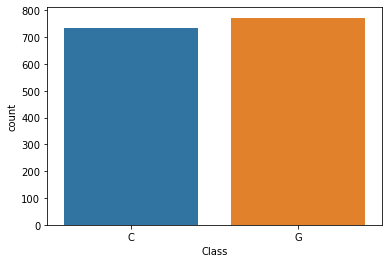

In [5]:
# Making a bar plot of different types of classes
sns.countplot(data["Class"])
plt.show()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1509 entries, 0 to 1508
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Class   1509 non-null   object
 1   x-box   1509 non-null   int64 
 2   y-box   1509 non-null   int64 
 3   width   1509 non-null   int64 
 4   high    1509 non-null   int64 
 5   onpix   1509 non-null   int64 
 6   x-bar   1509 non-null   int64 
 7   y-bar   1509 non-null   int64 
 8   x2bar   1509 non-null   int64 
 9   y2bar   1509 non-null   int64 
 10  xybar   1509 non-null   int64 
 11  x2ybr   1509 non-null   int64 
 12  xy2br   1509 non-null   int64 
 13  x-ege   1509 non-null   int64 
 14  xegvy   1509 non-null   int64 
 15  y-ege   1509 non-null   int64 
 16  yegvx   1509 non-null   int64 
dtypes: int64(16), object(1)
memory usage: 200.5+ KB


In [7]:
#Assinging features and dependent variables
X = data.drop(["Class"], axis=1)
print(X.head())

   x-box  y-box  width  high  onpix  x-bar  y-bar  x2bar  y2bar  xybar  x2ybr  \
0      4     10      5     8      2      5      7      7     10      7      6   
1      3      5      4     4      2      4      8      5      7     12      9   
2      5     10      6     7      3      8      7      8      8      6      7   
3      5      9      6     7      4      3      8      6      7     12     10   
4      4      8      5     6      3      6      6      7      6     10      7   

   xy2br  x-ege  xegvy  y-ege  yegvx  
0     13      1      8      4      9  
1     11      1     10      2      7  
2      9      2      7      5     10  
3     13      1      9      3      7  
4     12      2      9      4      9  


In [8]:
#Mapping Class variables to Numericals -> C == 0 and G==1
y = data["Class"].map({'C': 0 , 'G' : 1})
print(y.head())

0    0
1    0
2    1
3    0
4    1
Name: Class, dtype: int64


In [9]:
# 2. Make a train_test split.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40, test_size=.30)

In [10]:
#2. Fit a sequence of AdaBoostClassifier with varying number of weak learners ranging from 1 to 16, 
# keeping the max_depth as 1. Plot the accuracy on test set against the number of weak learners. 
# Use decision tree classifier as the base classifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

In [11]:
#DataFrame of Actuals Vs Predicted
df = pd.DataFrame([y_pred, y_test])
df.head()

,0,1,2,3,4,5,6,7,8,9,...,443,444,445,446,447,448,449,450,451,452
0,1,0,0,1,0,0,1,0,1,1,...,1,1,1,0,1,1,0,1,1,1
1,1,0,1,1,0,0,1,0,1,1,...,1,1,1,0,1,1,0,1,1,1


In [12]:
#Confusion matrix
print(f"Confusion matrix for a single DTC: \n{(np.sqrt(metrics.confusion_matrix(y_pred, y_test)))}")

Confusion matrix for a single DTC: 
[[14.07124728  3.16227766]
 [ 4.         15.13274595]]


In [13]:
#Accuracy
print(f"Accuracy Score for a single DTC: {metrics.accuracy_score(y_pred, y_test)}")

Accuracy Score for a single DTC: 0.9426048565121413


In [14]:
print(f"Classification Report for a single DTC: {metrics.classification_report(y_pred, y_test)}")

Classification Report for a single DTC:               precision    recall  f1-score   support

           0       0.93      0.95      0.94       208
           1       0.96      0.93      0.95       245

    accuracy                           0.94       453
   macro avg       0.94      0.94      0.94       453
weighted avg       0.94      0.94      0.94       453



In [15]:
"""2. Fit a sequence of AdaBoostClassifier with varying number of weak learners ranging from 1 to 16, 
keeping the max_depth as 1. 

Plot the accuracy on test set against the number of weak learners. 
Use decision tree classifier as the base classifier."""


#Using Max Depth =1
base_class = DecisionTreeClassifier(max_depth=1)
#No of Weak learners ranging from 1 to 16
parameters = range(1,17)
scores=[]

for i in parameters:
    ada_Boost = AdaBoostClassifier(
        base_estimator=base_class, n_estimators=i, learning_rate=1, algorithm='SAMME')
    ada_Boost.fit(X_train, y_train)
    y_pred = ada_Boost.predict(X_test)
    score = metrics.accuracy_score(y_pred, y_test)
    scores.append(score)
    
accuracy_max_depth1 = pd.DataFrame({'Number of weak learners': parameters, 'Accuracy Score': scores})
accuracy_max_depth1

,Number of weak learners,Accuracy Score
0,1,0.732892
1,2,0.732892
2,3,0.763797
3,4,0.779249
4,5,0.779249
5,6,0.810155
6,7,0.812362
7,8,0.836645
8,9,0.823400
9,10,0.841060


Text(0.5, 1.0, 'Number of weak learners vs Accuracy Score (Max Depth = 1)')

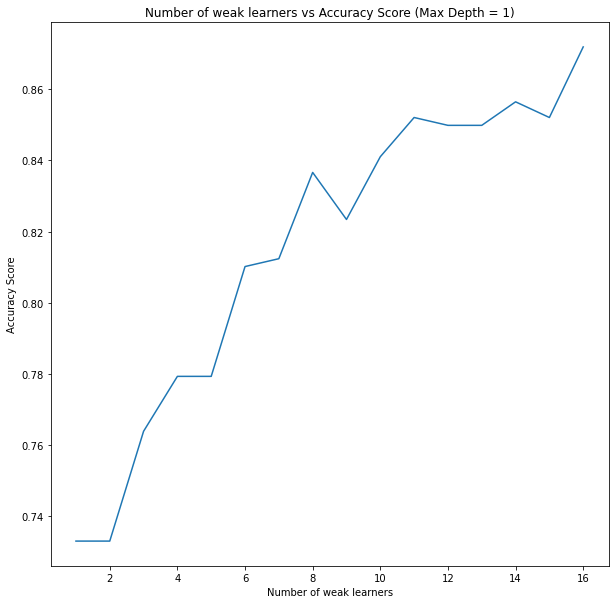

In [16]:
plt.figure(figsize=(10,10))
plt.plot(accuracy_max_depth1['Number of weak learners'], accuracy_max_depth1['Accuracy Score'])
plt.xlabel('Number of weak learners')
plt.ylabel('Accuracy Score')
plt.title("Number of weak learners vs Accuracy Score (Max Depth = 1)")

In [17]:
"""3.Repeat step2 with max_depth set as 2."""

#Repeating with Max Depth = 2
base_class = DecisionTreeClassifier(max_depth=2)
#No of Weak learners ranging from 1 to 16
parameters = range(1,17)
scores=[]

for i in parameters:
    ada_Boost = AdaBoostClassifier(
        base_estimator=base_class, n_estimators=i, learning_rate=1, algorithm='SAMME')
    ada_Boost.fit(X_train, y_train)
    y_pred = ada_Boost.predict(X_test)
    score = metrics.accuracy_score(y_pred, y_test)
    scores.append(score)
    
accuracy_max_depth2 = pd.DataFrame({'Number of weak learners': parameters, 'Accuracy Score': scores})
accuracy_max_depth2

,Number of weak learners,Accuracy Score
0,1,0.841060
1,2,0.841060
2,3,0.900662
3,4,0.860927
4,5,0.891832
5,6,0.894040
6,7,0.900662
7,8,0.927152
8,9,0.922737
9,10,0.940397


Text(0.5, 1.0, 'Number of weak learners vs Accuracy Score (Max Depth = 2)')

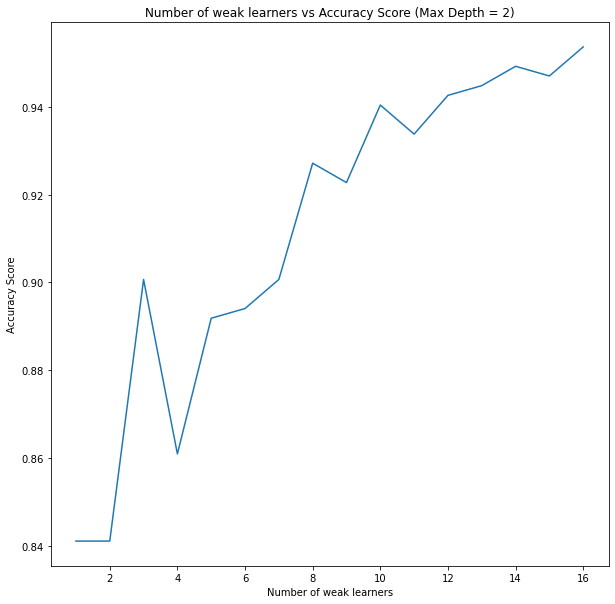

In [18]:
plt.figure(figsize=(10,10))
plt.plot(accuracy_max_depth2['Number of weak learners'], accuracy_max_depth2['Accuracy Score'])
plt.xlabel('Number of weak learners')
plt.ylabel('Accuracy Score')
plt.title("Number of weak learners vs Accuracy Score (Max Depth = 2)")